# a)

- Die Fehlerwahrscheinlichkeit ist 0% da er den Punkt schon kennt

- nein da vorallem bei höheren k, eine Abwägung stattfindet

- Fehlerwahrscheinlichkeit lässt sich stochastisch bestimmen indem man den Algorithmus gegen Daten mit bekannten Labels laufen lässt und die Falschklassifikationen zählt. 

- Bei der Kreuzvalidierung werden die Daten in S Teile aufgeteilt, und dann S mal jeweils mit einem andereren Teil als Testdaten validiert. Die Daten ohne den Testteil sind dabei immer die Trainingsdaten.

# b) 

- S ist die Anzahl der Teile in die der Datensatz zerteilt wird

- perm, Xp und Tp bringen die Daten in eine zufällige Reihenfolge

- idxS ist eine Liste der Anfangsindexe der S Teile

- Die Schleife läuft über alle S Teile und macht jeweils einen Test mit einem anderen Teil

- X_learn und T_learn bzw. X_test und T_test sind jeweils der Lerndatensatz und der Testdatensatz mit Labeln

- für S=1 sind alle Daten sowohl Testdaten als auch Lerndaten und es gibt nur einen Durchlauf

- Die Schleife läuft über alle Testdaten und testet sie.

-  pClassError ist die allgemeine Fehlerwahrscheinlichkeit, pConfError sind die Fehlerwahrscheinlichkeiten per Klasse

# c)

- V1A2_Classifier wird importiert damit die Classen (knn und Fastknn) darin verwendet werden können

- np.random.multivariate_normal(mu,sigma,N) hier würden N Datenpunkte gaußverteilt generiert werden.  
  N1, N2 sind die Größen der Teildatensätze und N ist ihre kombinierte Größe

- Klasse 0:  
Mittelwert = [1,1]  
Kovarianzmatrix = [[1,0.5],[0.5,1]]  
Klasse 1:  
Mittelwert = [3,1]    
Kovarianzmatrix = [[1,0.5],[0.5,1]]   

- pE_naive, pCE_naive sind die Fehlerwerte aus der Kreuzvalidierung und t_naive ist die benötigte Zeit

In [1]:
#!/usr/bin/env python
# Programmgeruest zu Versuch 1, Aufgabe 3
import numpy as np
import scipy.spatial
from random import randint
import matplotlib 
import matplotlib.pyplot as plt 
from time import clock
from V1A2_Classifier import *



In [2]:
#(i) create some synthetic data (2-dimensional Gaussian)
C=2                               # two classes
N1,N2=500,500                     # N1 and N2 data vectors for the two classes
mu1, mu2 = [1,1], [3,1]           # expectations for the two classes
sigma1 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 1
sigma2 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 2
X1 = np.random.multivariate_normal(mu1,sigma1,(N1))    # Gaussian data vectors for class 1
X2 = np.random.multivariate_normal(mu2,sigma2,(N2))    # Gaussian data vectors for class 2
T1,T2 = N1*[0],N2*[1]             # corresponding class labels 
X = np.concatenate((X1,X2))       # entire data set
T = np.concatenate((T1,T2))       # entire label set
N,D = X.shape[0], X.shape[1]      # size of data set
print("Data size: N=",N,", D=",D)


Data size: N= 1000 , D= 2


In [3]:
# (ii) create and test classifiers
k,S = 5,10                        # k=number of nearest neighbors; S=number of data subsets for cross validation
X_test = np.array([[2,1],[5,1],[-1,1]])   # Some additional data vectors to be tested 


In [4]:
# (ii.a) test of naive KNN classifier
print("\nNaive KNN Classifier:","\n------------------------")
knnc = KNNClassifier(C,k)         # create classifier object of class KNNClassifier
t1=clock()                        # start time     
pE_naive,pCE_naive = knnc.crossvalidate(S,X,T) # do S-fold cross validation for data X,T
t2=clock()                        # end time
t_naive=t2-t1                     # wall time required by the naive KNN algorithmus (in seconds)
print("S=", S, " fold Cross-Validation of naive ", k, "-NN-Classifier requires ", t_naive, " seconds. Confusion error probability matrix is \n", pCE_naive)
print("Probability of a classification error is pE = ", pE_naive)
knnc.fit(X,T)                     # train classifier with whole data set
for x_test in X_test:             # Test some additional data vectors x_test from X_test         
    t_test,p_class,idxNN = knnc.predict(x_test,k)
    print ("New data vector x_test=", x_test, " is most likely from class ", t_test, "; class probabilities are p_class = ", p_class)



Naive KNN Classifier: 
------------------------
S= 10  fold Cross-Validation of naive  5 -NN-Classifier requires  0.14098100000000002  seconds. Confusion error probability matrix is 
 [[ 0.832  0.178]
 [ 0.168  0.822]]
Probability of a classification error is pE =  0.173
New data vector x_test= [2 1]  is most likely from class  1 ; class probabilities are p_class =  [0.4, 0.6]
New data vector x_test= [5 1]  is most likely from class  1 ; class probabilities are p_class =  [0.0, 1.0]
New data vector x_test= [-1  1]  is most likely from class  0 ; class probabilities are p_class =  [1.0, 0.0]


# zu c)  
- 

In [5]:
# (ii.b) test of KD-tree KNN classifier
print("\nFast KNN Classifier based on KD-Trees:","\n---------------------------------------")
knnc = FastKNNClassifier(C,k)         # create classifier object of class KNNClassifier
t1=clock()                        # start time     
pE_kdtree,pCE_kdtree = knnc.crossvalidate(S,X,T) # do S-fold cross validation for data X,T
t2=clock()                        # end time
t_kdtree=t2-t1                     # wall time required by the naive KNN algorithmus (in seconds)
print("S=", S, " fold Cross-Validation of naive ", k, "-NN-Classifier requires ", t_kdtree, " seconds. Confusion error probability matrix is \n", pCE_kdtree)
print("Probability of a classification error is pE = ", pE_kdtree)
knnc.fit(X,T)                     # train classifier with whole data set
for x_test in X_test:             # Test some additional data vectors x_test from X_test         
    t_test,p_class,idxNN = knnc.predict(x_test,k)
    print ("New data vector x_test=", x_test, " is most likely from class ", t_test, "; class probabilities are p_class = ", p_class)




Fast KNN Classifier based on KD-Trees: 
---------------------------------------
S= 10  fold Cross-Validation of naive  5 -NN-Classifier requires  0.591526  seconds. Confusion error probability matrix is 
 [[ 0.792  0.188]
 [ 0.208  0.812]]
Probability of a classification error is pE =  0.198
New data vector x_test= [2 1]  is most likely from class  1 ; class probabilities are p_class =  [0.4, 0.6]
New data vector x_test= [5 1]  is most likely from class  1 ; class probabilities are p_class =  [0.0, 1.0]
New data vector x_test= [-1  1]  is most likely from class  0 ; class probabilities are p_class =  [1.0, 0.0]


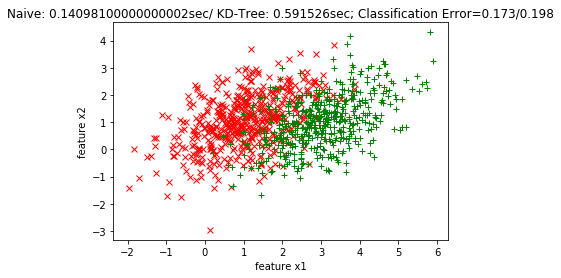

In [6]:
# (iii) plot data
f=plt.figure()
a = f.add_subplot(111)
a.plot(X1.T[0],X1.T[1],'rx')               # plot data vectors of class 1
a.plot(X2.T[0],X2.T[1],'g+')               # plot data vectors of class 2
a.set_xlabel('feature x1');
a.set_ylabel('feature x2');
a.set_title('Naive: '+str(t_naive)+'sec/ KD-Tree: '+str(t_kdtree)+'sec; Classification Error='+str(pE_naive)+'/'+str(pE_kdtree));

plt.show()


# d)

- k = 1 gibt error noch verbessern

In [8]:
print("\nFast KNN Classifier based on KD-Trees:","\n---------------------------------------")
for k in (1,5,11):
    for S in (1,2,5):
        knnc = FastKNNClassifier(C,k)         # create classifier object of class KNNClassifier  
        pE_kdtree,pCE_kdtree = knnc.crossvalidate(S,X,T) # do S-fold cross validation for data X,T
        print("S=", S, " fold Cross-Validation of naive ", k, "-NN-Classifier requires ", t_kdtree, " seconds. Confusion error probability matrix is \n", pCE_kdtree)
        print("Probability of a classification error is pE = ", pE_kdtree)
        knnc.fit(X,T)                     # train classifier with whole data set
        for x_test in X_test:             # Test some additional data vectors x_test from X_test         
            t_test,p_class,idxNN = knnc.predict(x_test,k)
            print ("New data vector x_test=", x_test, " is most likely from class ", t_test, "; class probabilities are p_class = ", p_class)



Fast KNN Classifier based on KD-Trees: 
---------------------------------------
S= 1  fold Cross-Validation of naive  1 -NN-Classifier requires  0.591526  seconds. Confusion error probability matrix is 
 [[ 1.  0.]
 [ 0.  1.]]
Probability of a classification error is pE =  0.0
New data vector x_test= [2 1]  is most likely from class  1 ; class probabilities are p_class =  [0.0, 1.0]
New data vector x_test= [5 1]  is most likely from class  1 ; class probabilities are p_class =  [0.0, 1.0]
New data vector x_test= [-1  1]  is most likely from class  0 ; class probabilities are p_class =  [1.0, 0.0]
S= 2  fold Cross-Validation of naive  1 -NN-Classifier requires  0.591526  seconds. Confusion error probability matrix is 
 [[ 0.82  0.18]
 [ 0.18  0.82]]
Probability of a classification error is pE =  0.18
New data vector x_test= [2 1]  is most likely from class  1 ; class probabilities are p_class =  [0.0, 1.0]
New data vector x_test= [5 1]  is most likely from class  1 ; class probabilitie